# Bank Loan Prediction 

In [2]:
# Importing the necessary libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE


sns.set_style("darkgrid")

# Reading the dataset


In [3]:
df = pd.read_csv("C:/Users/OWNER/Downloads/loan-train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploring the dataset

In [4]:
# Lets get information about the columns in the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Lets do some data analysis on some of the features

Categorical Features

# Married


Married: 398
Not Married: 213
Missing value: 3


C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


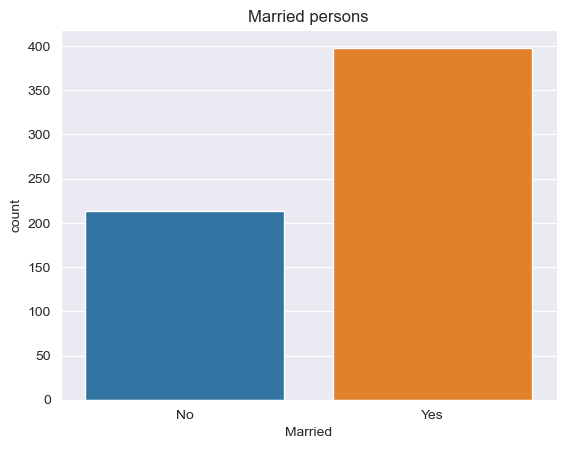

In [5]:
# Married

print('Married:',len(df[df['Married'] == 'Yes']))
print('Not Married:',len(df[df['Married'] == 'No']))
print('Missing value:',df['Married'].isnull().sum())

plt.title('Married persons')
sns.countplot(df['Married'])
plt.show()

# Dependents

Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Missing values : 15


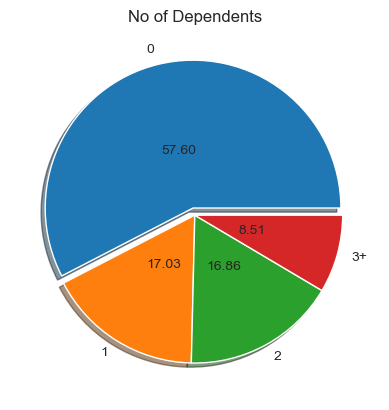

In [6]:
print('Dependents')
print(df['Dependents'].value_counts())
print('Missing values :',df['Dependents'].isnull().sum())

num_dependents = [i for i in df['Dependents'].value_counts()]
labels_dependents = [i for i in df['Dependents'].unique()[:4]]

plt.title('No of Dependents')
plt.pie(num_dependents,labels=labels_dependents,autopct=f'%.2f',explode=(0.05,0,0,0),shadow=True,pctdistance=0.4)
plt.show()



From this pie chart we can see that the highest number of dependents is 0

# Education

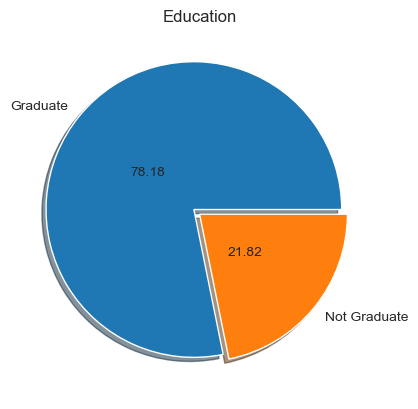

In [7]:
num_education = [i for i in df['Education'].value_counts()]
labels_edu = [i for i in df['Education'].unique()]

plt.title('Education')
plt.pie(num_education,labels=labels_edu,autopct=f'%.2f',explode=(0.05,0),shadow=True,pctdistance=0.4)

plt.show()

               Education -  Graduate > Not Graduate

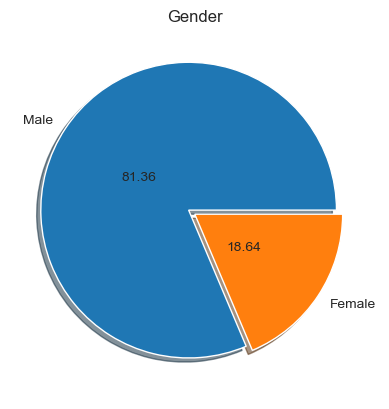

In [8]:
num_gender = [i for i in df['Gender'].value_counts()]
labels_gender = [i for i in df['Gender'].unique()[:2]]

plt.title('Gender')
plt.pie(num_gender,labels=labels_gender,autopct=f'%.2f',explode=(0.05,0),shadow=True,pctdistance=0.4)
plt.show()


The gender in our dataset is not evenly distributed. 
Males are four times the size the females

# Credit History

1.0    475
0.0     89
Name: Credit_History, dtype: int64


C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

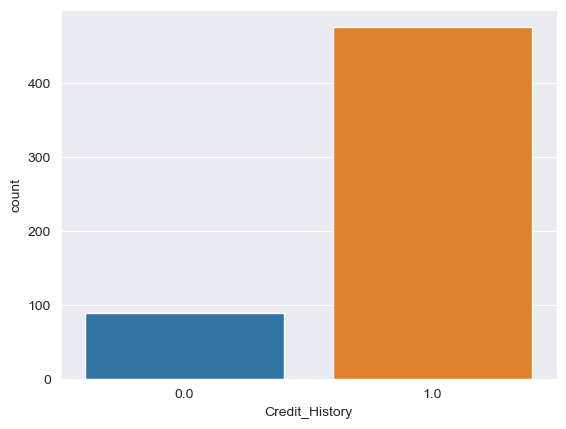

In [9]:
print(df['Credit_History'].value_counts())
sns.countplot(df['Credit_History'])

Most of the applicants have a good credit score

# Loan_Status

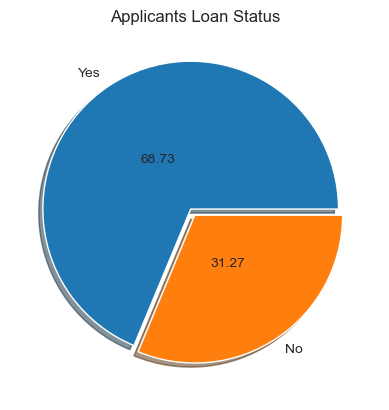

In [10]:
# A pie chart showing the loan status
loan_status = [df['Loan_Status'].value_counts()[0],df['Loan_Status'].value_counts()[1]]

plt.title('Applicants Loan Status')
plt.pie(loan_status,labels=['Yes','No'],autopct=f'%.2f',explode=(0.05,0),shadow=True,pctdistance=0.4)
plt.show()

As we can see the number of accepted loans is greater than the not_accepted

Numerical Values

# Applicant and Coapplicant income

C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

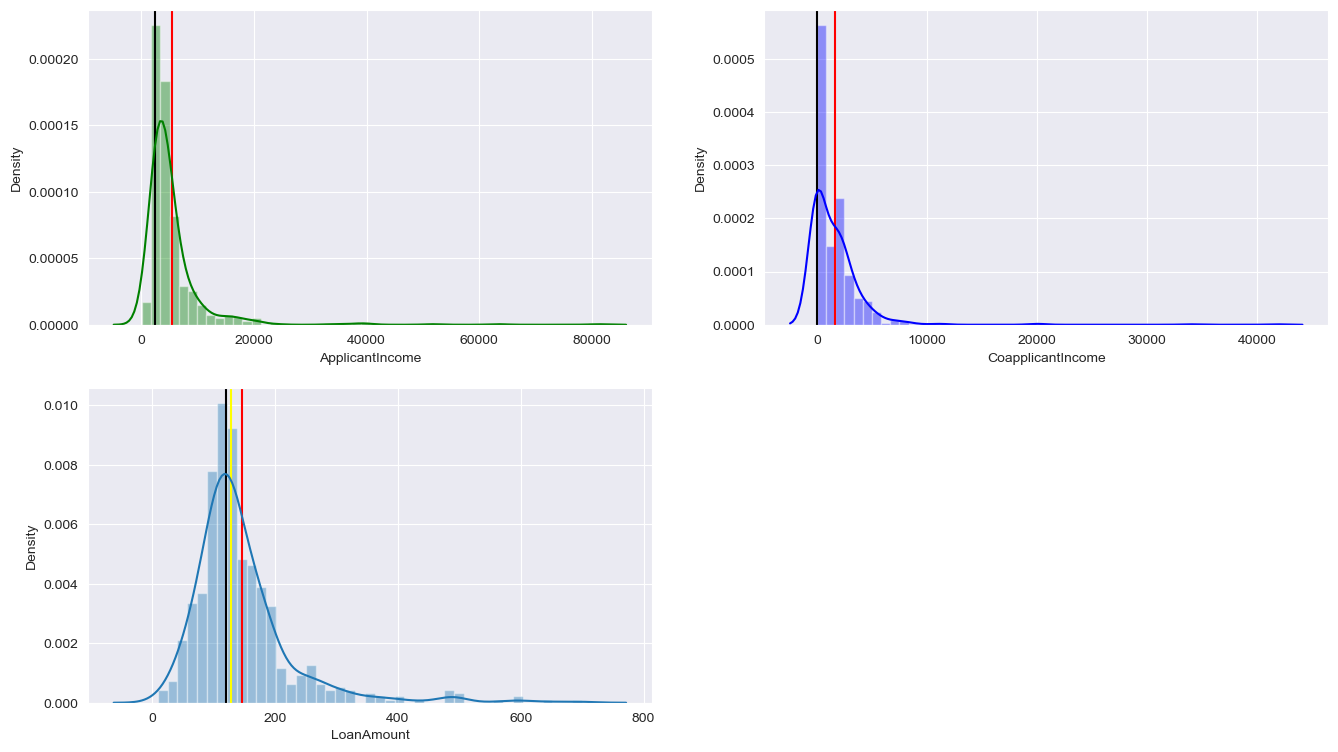

In [11]:
# lets make a distplot and histplot showing the applicant and coapplicant income distribution


plt.subplots(figsize=(16,9))

plt.subplot(2,2,1)
# 
plt.axvline(x=df['ApplicantIncome'].mean(),color='red')
plt.axvline(x=df['ApplicantIncome'].mode()[0],color='black')
sns.distplot(df['ApplicantIncome'],color='green',hist=True)


plt.subplot(2,2,2)
plt.axvline(x=df['CoapplicantIncome'].mean(),color='red')
plt.axvline(x=df['CoapplicantIncome'].mode()[0],color='black')
sns.distplot(df['CoapplicantIncome'],color='blue',hist=True)


plt.subplot(2,2,3)
plt.axvline(x=df['LoanAmount'].mean(),color='red')
plt.axvline(x=df['LoanAmount'].mode()[0],color='black')
plt.axvline(x=df['LoanAmount'].median(),color='yellow')
sns.distplot(df['LoanAmount'],hist=True)

plt.show()

Black axvline denotes Mode     while       Red axvline - Mean

This distribution is highly skewed and as a result there will be outliers 
which will need to be handled so as to get a good model

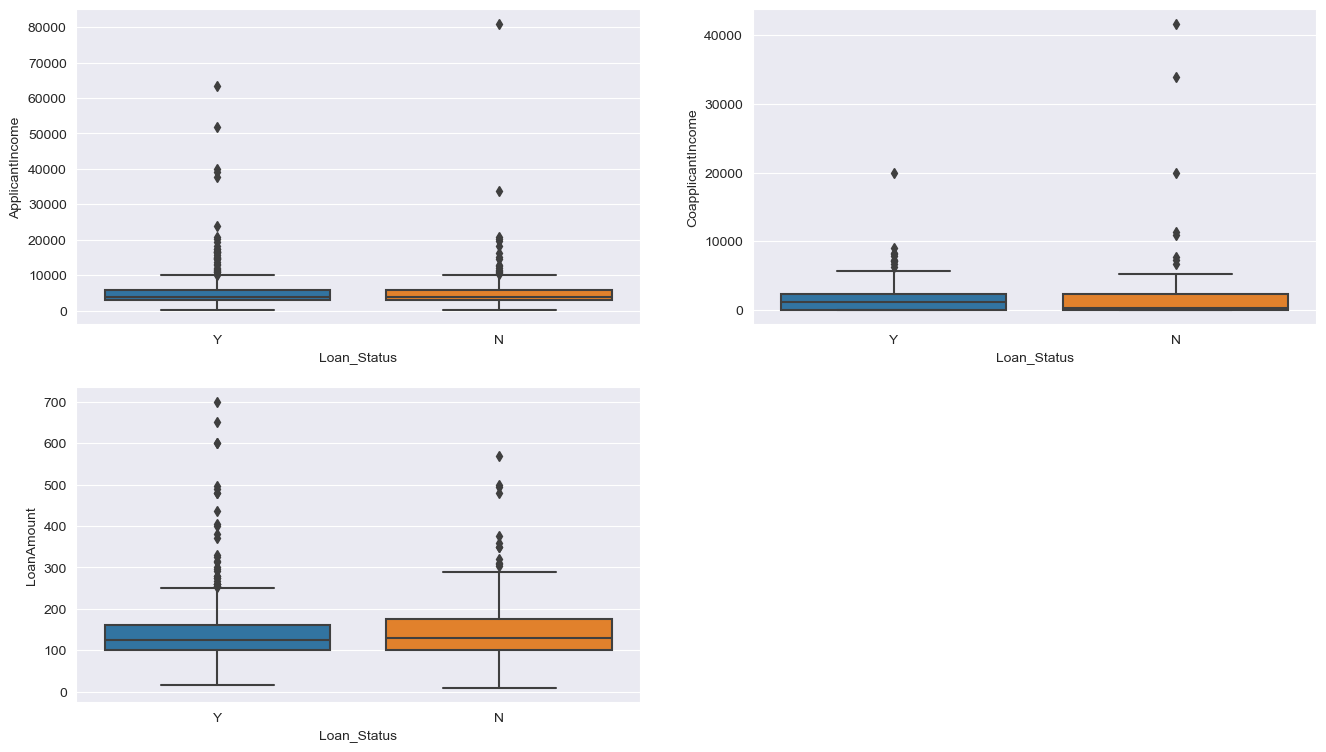

In [12]:
plt.subplots(figsize=(16,9))

plt.subplot(2,2,1)

sns.boxplot(x=df['Loan_Status'],y=df['ApplicantIncome'])
# plt.title("ApplicantIncome")


plt.subplot(2,2,2)
sns.boxplot(x=df['Loan_Status'],y=df['CoapplicantIncome'])

plt.subplot(2,2,3)
sns.boxplot(x=df['Loan_Status'],y=df['LoanAmount'])


plt.show()

Box plot showing the outliers

# Data preparation and prepocessing

Data Cleaning - Imputation of data

In [13]:
# Removing unrelavant feature
df.drop('Loan_ID',axis=1,inplace=True)

In [14]:
# Checking for null values 
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We do not have a large dataset so we cant afford to drop the null values


In [15]:
# Filling the null categorical values with the mode(most occuring value)

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['LoanAmount'].mode()[0],inplace=True)

# filling the null numerical values in each column  with the mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)



In [16]:
# Our data is now clean 

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# One-hot encoding 

In [18]:
# Lets convert the categorical values into numerical Values
df['Gender']= df['Gender'].map({'Male':1 ,'Female':0})
df['Married'] = df['Married'].map({'No':0,'Yes':1})
df['Dependents'] = df['Dependents'].map({data:i for i,data in enumerate(df['Dependents'].unique())})
df['Education'] = df['Education'].map({'Graduate': 1,'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1})
df['Property_Area'] = df['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

<AxesSubplot:title={'center':'Correlation Heatmap'}>

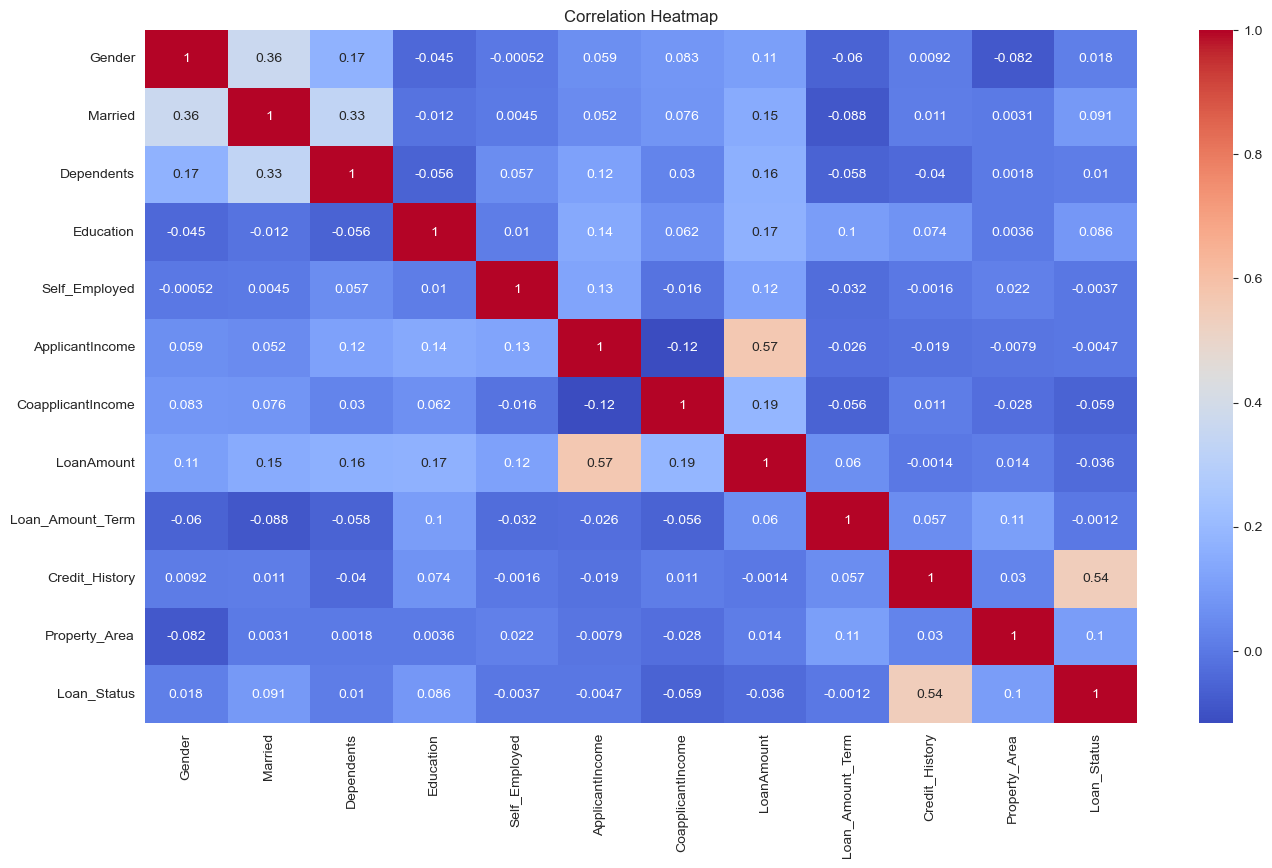

In [19]:
corr = df.corr()
plt.figure(figsize=(16,9))
plt.title("Correlation Heatmap")
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Handling Outliers

In [20]:
# We are going the IQR Based Filtering to remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1  - 1.5 * IQR

df = df[~((df < lower_limit) | (df > upper_limit)).any(axis=1) ]

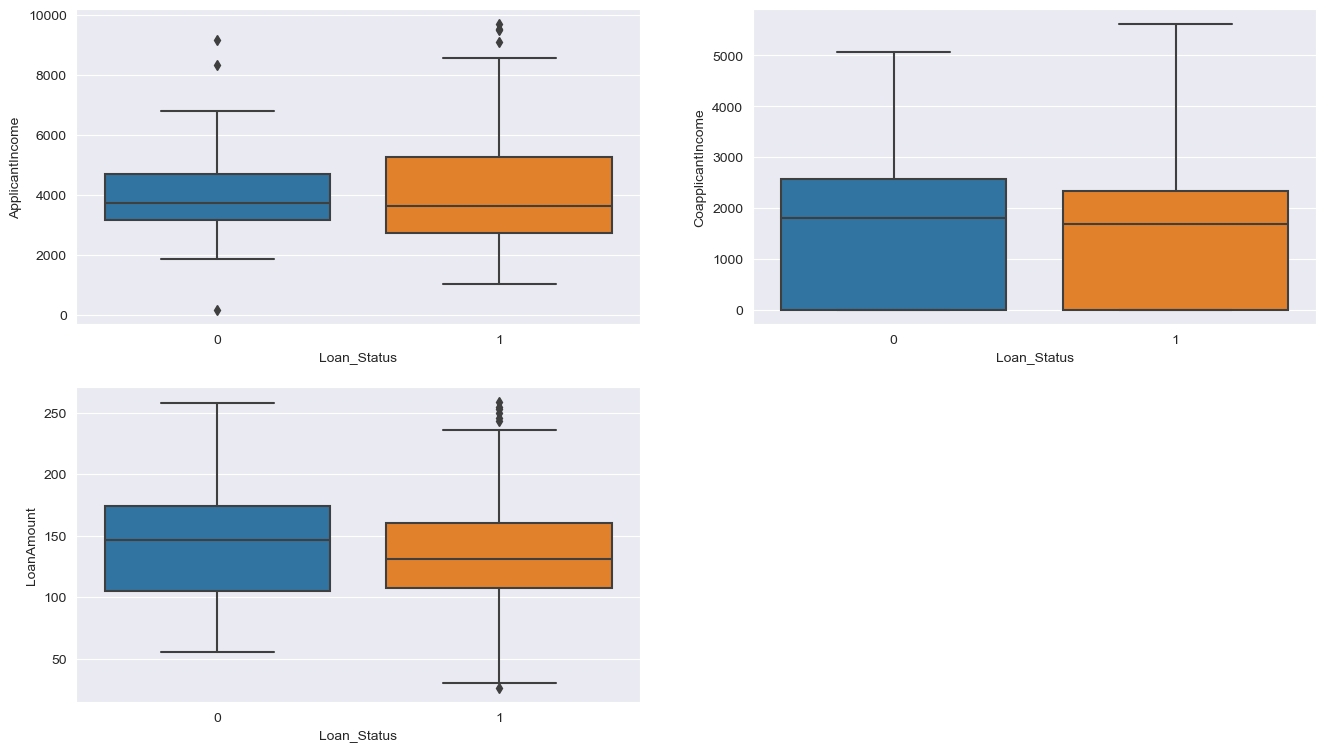

In [21]:
plt.subplots(figsize=(16,9))

plt.subplot(2,2,1)
sns.boxplot(x=df['Loan_Status'],y=df['ApplicantIncome'])

plt.subplot(2,2,2)
sns.boxplot(x=df['Loan_Status'],y=df['CoapplicantIncome'])

plt.subplot(2,2,3)
sns.boxplot(x=df['Loan_Status'],y=df['LoanAmount'])

plt.show()

# Handling skewness

In [22]:
# log transformation to handle the highly skewed features

df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'] + 1)
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['LoanAmount'] = np.log(df['LoanAmount'])

-0.2295302982941288
-1.3261623406639453
-0.9403318132868772


C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

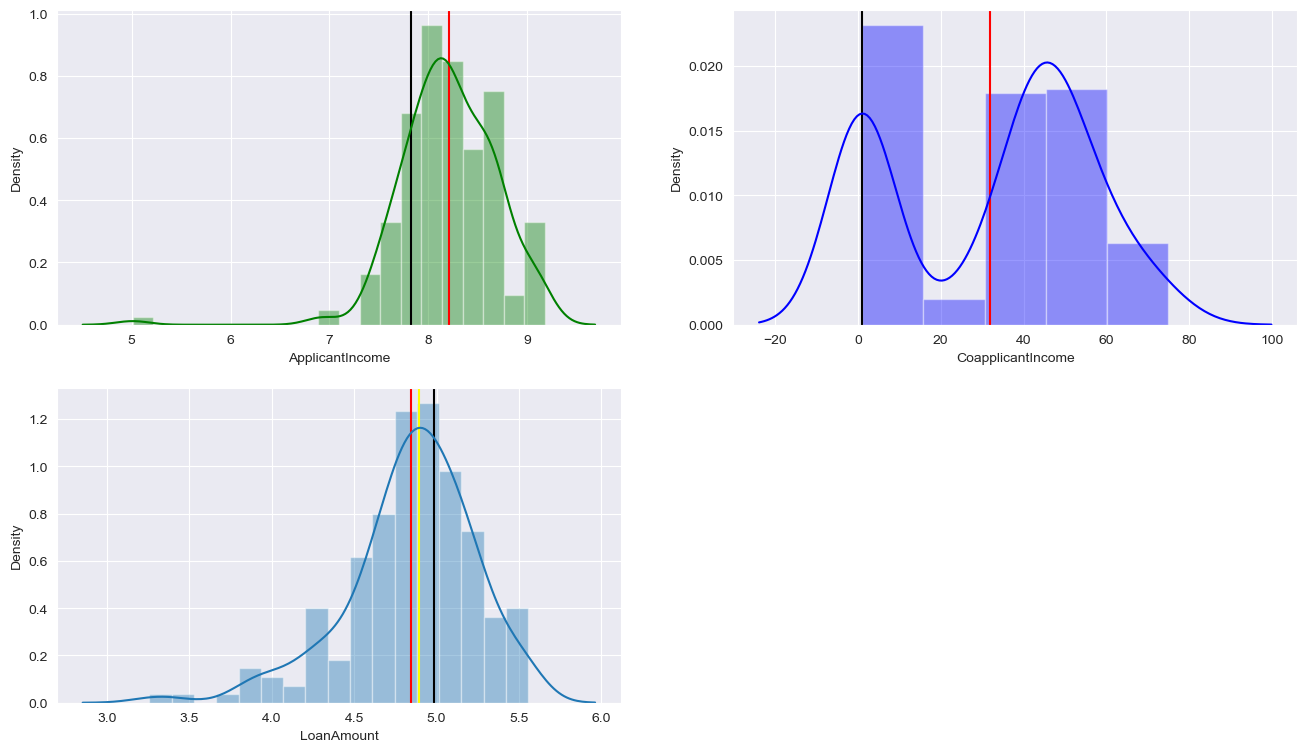

In [23]:
print(df['CoapplicantIncome'].skew())
print(df['ApplicantIncome'].skew())
print(df['LoanAmount'].skew())

plt.subplots(figsize=(16,9))

plt.subplot(2,2,1)
# 
plt.axvline(x=df['ApplicantIncome'].mean(),color='red')
plt.axvline(x=df['ApplicantIncome'].mode()[0],color='black')
sns.distplot(df['ApplicantIncome'],color='green',hist=True)
# plt.title("ApplicantIncome")


plt.subplot(2,2,2)
plt.axvline(x=df['CoapplicantIncome'].mean(),color='red')
plt.axvline(x=df['CoapplicantIncome'].mode()[0],color='black')
# sns.distplot(df['CoapplicantIncome'],color='blue',bins=[i for i in range(0, 8000) if i % 500 == 0],hist=True)
sns.distplot(df['CoapplicantIncome'],color='blue',hist=True)


plt.subplot(2,2,3)
plt.axvline(x=df['LoanAmount'].mean(),color='red')
plt.axvline(x=df['LoanAmount'].mode()[0],color='black')
plt.axvline(x=df['LoanAmount'].median(),color='yellow')
sns.distplot(df['LoanAmount'],hist=True)

plt.show()

In [24]:
# shuffling the dataset
from sklearn.utils import shuffle
df = shuffle(df)

# Seperating into features and Labels

In [25]:
X = df.iloc[:,:-1].values
y = df['Loan_Status'].values


# Balancing the data

From the exploration of the data,the number of approved and rejected loan is not balanced. So we will using the oversampling technique to handle this so our model doesnt overfits

In [26]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)

C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

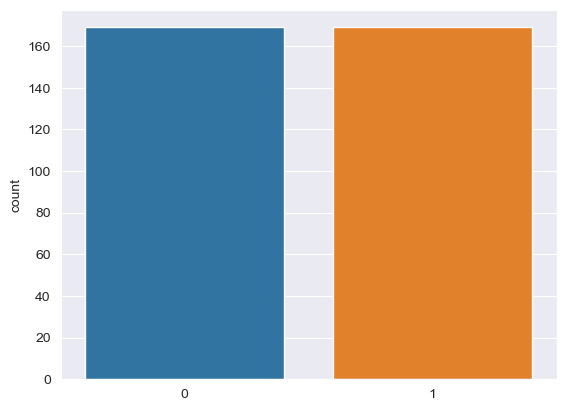

In [27]:
sns.countplot(y)

As we can see the target features is now balanced

# Scaling

In [28]:
# We are going to use the minmaxscaler to scale our feature variables
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Splitting data for training and testing

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)


# Model 

We'll be testing out to classification algorithms- RandomForestClassifier and GradientBoostingClassifier. I'll use GridSearcCV
and RandomizedSearchCV for hypertuning so we can find the best hyperparameters for our models

N/B:You can also try out other models like GaussianNB,SVC or logisticRegression

# RandomForest

In [30]:
# Hyperparameters to test out
param_grid = {'n_estimators':[10,100,1000],'criterion': ['gini','entropy'],
              'random_state': [2],'max_leaf_nodes':[20,25,30,40]}

cv =  GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3,n_jobs=-1)

In [31]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [20, 25, 30, 40],
                         'n_estimators': [10, 100, 1000], 'random_state': [2]},
             verbose=3)

In [32]:
cv.best_params_

{'criterion': 'gini',
 'max_leaf_nodes': 40,
 'n_estimators': 1000,
 'random_state': 2}

In [33]:
# After the hyperparameter tuning,found this to be the best parameters for The RFclassifier

from sklearn.ensemble import RandomForestClassifier

RFmodel = RandomForestClassifier(criterion='gini',n_estimators=1000, random_state=2, max_leaf_nodes=20)
RFmodel.fit(X_train,y_train)


RandomForestClassifier(max_leaf_nodes=20, n_estimators=1000, random_state=2)

In [34]:
RF_predictions = RFmodel.predict(X_test)

In [35]:
print(classification_report(y_test,RF_predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        35
           1       0.90      0.79      0.84        33

    accuracy                           0.85        68
   macro avg       0.86      0.85      0.85        68
weighted avg       0.86      0.85      0.85        68



<AxesSubplot:title={'center':'Predictions Confusion marix'}>

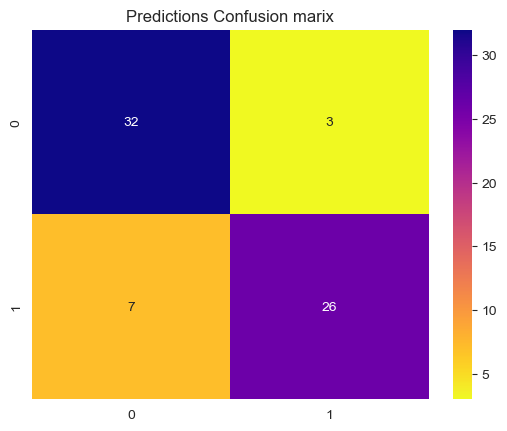

In [36]:
matrix = confusion_matrix(y_test,RF_predictions)
plt.title('Predictions Confusion marix')
sns.heatmap(matrix,annot=True,cmap='plasma_r')

# GradientBoosting

In [37]:
GBparams = {'n_estimators':[100,200,300,400,500,1000],'max_depth':[1,2,3,4,5],'subsample':[0.5],
            'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [38]:
RSCV_GB = RandomizedSearchCV(GradientBoostingClassifier(), GBparams, cv=20)

In [39]:
RSCV_GB.fit(X_train,y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 1000],
                                        'subsample': [0.5]})

In [40]:
print(RSCV_GB.best_estimator_)
print(RSCV_GB.best_params_)


GradientBoostingClassifier(max_leaf_nodes=40, n_estimators=200, subsample=0.5)
{'subsample': 0.5, 'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 3}


In [41]:
GBclassifier = GradientBoostingClassifier(subsample=0.5,n_estimators=300,max_depth=3,max_leaf_nodes=10)

In [42]:
GBclassifier.fit(X_train,y_train)

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=300, subsample=0.5)

In [43]:
GB_predictions = GBclassifier.predict(X_test)

In [44]:
# checking the metrics of our model
print(classification_report(y_test,GB_predictions))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.91      0.88      0.89        33

    accuracy                           0.90        68
   macro avg       0.90      0.90      0.90        68
weighted avg       0.90      0.90      0.90        68



`Plotting Confusion Matix

In [45]:
matrix = confusion_matrix(y_test,GB_predictions)

<AxesSubplot:>

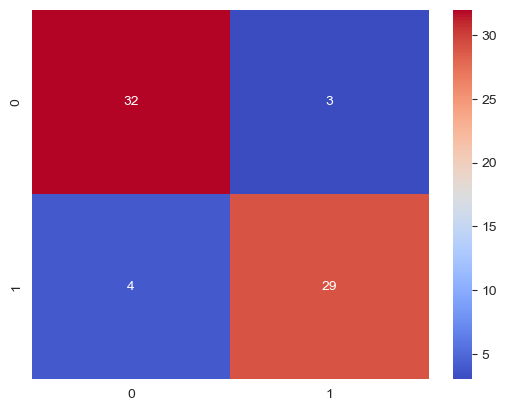

In [46]:
sns.heatmap(matrix,annot=True,cmap='coolwarm')

After alot of iterations of training and testing,we can see that our models achieved about 75 - 90% accuracy

# Testing our model on unseen data

In [61]:
# Preprocessing the data so it can have same features as the one we trained our model with
def preprocess_data(filename):
    data = pd.read_csv(filename)
    
    data.drop('Loan_ID',axis=1,inplace=True)
    # Filling the null categorical values with the mode(most occuring value)

    data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
    data['Married'].fillna(data['Married'].mode()[0],inplace=True)
    data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
    data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
    data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
    data['Loan_Amount_Term'].fillna(data['LoanAmount'].mode()[0],inplace=True)

    # filling the null numerical values in each column  with the mean
    data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
    
    # Lets convert the categorical values into numerical Values
    data['Gender']= data['Gender'].map({'Male':1 ,'Female':0})
    data['Married'] = data['Married'].map({'No':0,'Yes':1})
    data['Dependents'] = data['Dependents'].map({data:i for i,data in enumerate(data['Dependents'].unique())})
    data['Education'] = data['Education'].map({'Graduate': 1,'Not Graduate': 0})
    data['Self_Employed'] = data['Self_Employed'].map({'No':0,'Yes':1})
    data['Property_Area'] = data['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})
   

    # We are going the IQR Based Filtering to remove outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1  - 1.5 * IQR

    data = data[~((data < lower_limit) | (data > upper_limit)).any(axis=1) ]
    # log transformation to handle the highly skewed features

    data['CoapplicantIncome'] = np.sqrt(data['CoapplicantIncome'] + 1)
    data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
    data['LoanAmount'] = np.log(data['LoanAmount'])
    
    # shuffling the dataset
    from sklearn.utils import shuffle
    data = shuffle(data)
    
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)

    return data
    




Loading test Data

In [62]:
test_data = preprocess_data("C:/Users/OWNER/Downloads/loan-test.csv")

In [66]:
#Predicted labels on the test data
GBclassifier.predict(test_data)

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)